<a href="https://colab.research.google.com/github/simranbhurat/DM2-Project/blob/Vitor/eda/DMC_EDA_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -l -s https://github.com/simranbhurat/DM2-Project.git 

Cloning into 'DM2-Project'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 11), reused 23 (delta 2), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [2]:
import pandas as pd


print('Orders Dataframe: \n')
orders = pd.read_csv('DM2-Project/src/data/orders.csv', sep='|')
print(orders.info(), '\n')
orders.head()

Orders Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071538 entries, 0 to 1071537
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1071538 non-null  object
 1   userID  1071538 non-null  int64 
 2   itemID  1071538 non-null  int64 
 3   order   1071538 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.7+ MB
None 



,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [3]:
print('Items Dataframe: \n')
items = pd.read_csv('DM2-Project/src/data/items.csv', sep='|')
print(items.info(), '\n')
print(items.describe(), '\n')
items.head()

Items Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      32776 non-null  int64 
 1   brand       32776 non-null  int64 
 2   feature_1   32776 non-null  int64 
 3   feature_2   32776 non-null  int64 
 4   feature_3   32776 non-null  int64 
 5   feature_4   32776 non-null  int64 
 6   feature_5   32776 non-null  int64 
 7   categories  25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB
None 

             itemID         brand     feature_1     feature_2     feature_3  \
count  32776.000000  32776.000000  32776.000000  32776.000000  32776.000000   
mean   16387.500000    702.776574      6.451062      0.817946    440.280388   
std     9461.760548    432.774074      2.744884      0.778284    132.566994   
min        0.000000     -1.000000     -1.000000      0.000000     -1.000000   
25%     8193.750000  

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
print('Category Hierarchy Dataframe: \n')
hierarchy = pd.read_csv('DM2-Project/src/data/category_hierarchy.csv', sep='|')
print(hierarchy.info(), '\n')
hierarchy.head()

Category Hierarchy Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         4332 non-null   int64
 1   parent_category  4332 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB
None 



,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [5]:
hierarchy['level'] = 0

root_index = hierarchy[hierarchy['category']==hierarchy['parent_category']].index
hierarchy.loc[root_index, 'level'] = 1
root_categories = list(hierarchy.loc[root_index, 'category'])

level_1_index = hierarchy.query(
    'parent_category in @root_categories and category not in @root_categories'
).index

level_index = level_1_index

for level in range(1, 14):
    hierarchy.loc[level_index, 'level'] = level + 1
    level_categories = list(hierarchy[hierarchy['level']==level+1]['category'])
    next_level_index = hierarchy.query(
        'parent_category in @level_categories and category not in @level_categories'
    ).index
    level_index = next_level_index

level_0_index = hierarchy[hierarchy['level']==0]['category'].index
hierarchy.drop(index=level_0_index, inplace=True)

hierarchy.sort_values(by='level').head(10)

,category,parent_category,level
3930,3898,3898,1
4331,4299,3898,2
4035,4003,3898,2
384,381,3898,2
4036,4004,3898,2
4037,4005,3898,2
4038,4006,3898,2
2887,2863,3898,2
4039,4007,3898,2
4040,4008,3898,2


In [11]:
hierarchy.groupby(['level']).count()

,category,parent_category
level,,
1,1,1
2,485,485
3,668,668
4,1949,1949
5,865,865
6,234,234
7,78,78
8,9,9
9,22,22


In [6]:
hierarchy.describe()

,category,parent_category,level
count,4311.000000,4311.000000,4311.000000
mean,2148.108559,2205.317328,4.016701
std,1241.497665,1222.949943,1.161325
min,0.000000,8.000000,1.000000
25%,1071.500000,1147.000000,3.000000
50%,2148.000000,2284.000000,4.000000
75%,3222.500000,3329.000000,5.000000
max,4299.000000,3898.000000,9.000000


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

hierarchy_graph = nx.from_pandas_edgelist(
    df=hierarchy,
    source='category',
    target='parent_category'
)

hubs, authorities = nx.hits(hierarchy_graph, normalized=False)

max_authority = sorted(list(authorities.values()), reverse=True)[0]
max_authority

0.713745159124934

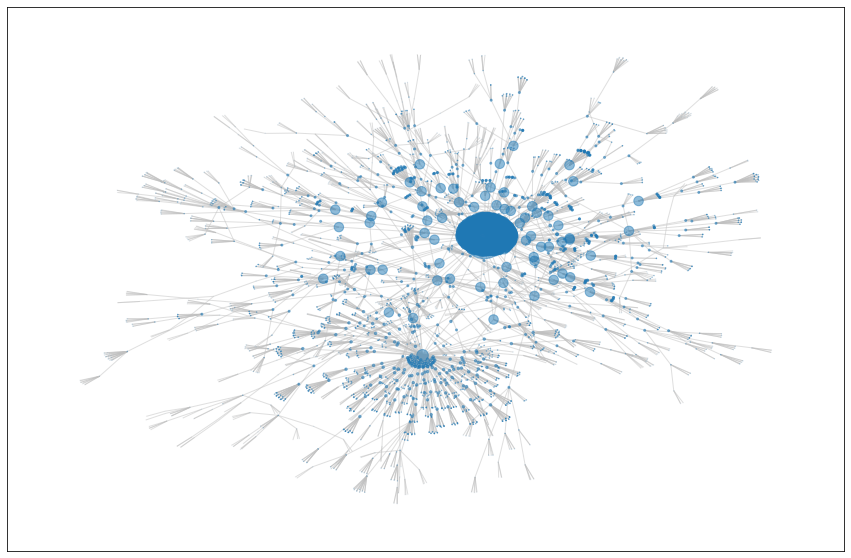

In [8]:
nodelist = list(authorities.keys())
node_size = [value * 2000 / max_authority for value in authorities.values()]

nx.draw_networkx(
    hierarchy_graph, 
    with_labels=False, 
    alpha=0.5,
    nodelist=nodelist, 
    node_size=node_size,
    edge_color="silver",
)
fig = plt.gcf()
fig.set_size_inches(15 , 10)
plt.show()

In [9]:
authorities_df = pd.DataFrame(
    [{'node': k, 'authority': v} for k, v in authorities.items()]
)

authorities_df.sort_values(by='authority', ascending=False).head(10)

,node,authority
68,3898,0.713745
17,2364,0.048166
319,2231,0.033986
103,1666,0.033337
198,600,0.033199
846,2346,0.032666
308,1062,0.032598
195,3624,0.032595
72,678,0.032536
696,1480,0.032531


In [10]:
categories_authorities = pd.merge(
    hierarchy, 
    authorities_df, 
    how='left', 
    left_on='category', 
    right_on='node',
)